<a href="https://colab.research.google.com/github/CPernet/ReproducibleQuantitativeDataScience/blob/main/ProvenanceInPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Provenance in Practice

Let's make a very simple example showcasing the need for provenance in practice!

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Data

I will provide you with some data. I will claim this shows the association between temperature measured during summer days in Copenhagen and how many scoops of ice cream I eat.

In [3]:
rng = np.random.RandomState(1)
x = 30 * rng.rand(50)
y = 1/12 * x + rng.randn(50) + 1

# ice cream consumption
ICC = pd.DataFrame({'temperature [Celsius]': x,
                       'ice cream [# scoops]': y})

We can look at the data inside the pandas dataframe:

In [34]:
ICC = ICC[ICC['ice cream [# scoops]'] >= 0]

We can also easily visualize the data:

Text(0, 0.5, 'Scoops of ice cream Melanie eats [# of scoops]')

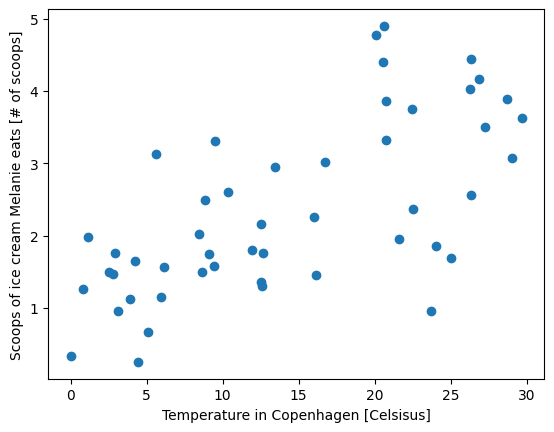

In [35]:
plt.scatter(ICC['temperature [Celsius]'], ICC['ice cream [# scoops]']);
plt.xlabel('Temperature in Copenhagen [Celsisus]')
plt.ylabel('Scoops of ice cream Melanie eats [# of scoops]')

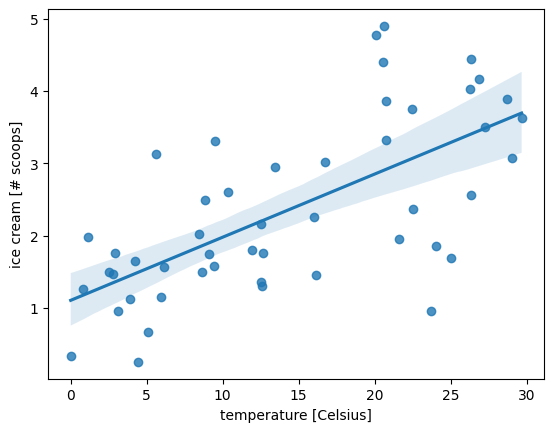

In [36]:
import seaborn as sns

# plot 1 with axes level-plot
ax = sns.regplot(data=ICC, x='temperature [Celsius]', y='ice cream [# scoops]')

We can also save the data as a .csv file.

In [37]:
ICC.to_csv('MelsIceCreamHabits.csv')

In [40]:
from sklearn.linear_model import LinearRegression, Ridge

lin = LinearRegression(fit_intercept=False)

x=np.array(ICC['temperature [Celsius]']).reshape(-1, 1)

y=np.array(ICC['ice cream [# scoops]']).reshape(-1, 1)

lin.fit(x, y)

print(lin.predict(np.array(40).reshape(-1,1)))


[[5.70006751]]


In [30]:
ridge = Ridge(alpha=0.0001)

ridge.fit(x, y)

print(ridge.predict(np.array(40).reshape(-1,1)))

[[4.69754033]]


In [31]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.001)

las.fit(x, y)
print(las.predict(np.array(40).reshape(-1,1)))

[4.69723051]


In [33]:
from sklearn.svm import LinearSVR

svc = LinearSVR()

svc.fit(x, y)

print(svc.predict(np.array(40).reshape(-1,1)))

[5.81235011]


/Users/anglup/Library/Caches/pypoetry/virtualenvs/reproduciblequantitativedatascience-2024-okua1UvA-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/anglup/Library/Caches/pypoetry/virtualenvs/reproduciblequantitativedatascience-2024-okua1UvA-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Conclusion of Melanie's Data Analysis

Now I have analyzed this data and come to the following conlusion:

Whenever the temperature hits 40 degrees Celsius in Copenhagen, Melanie will eat 5.7 scoops of ice cream.

I formatted the data nicely for you, so it's not a problma at all to understand what I did, right?

## Can you arrive at the same conclusion?

Let's see if you can! I gave you the data and a simple problem, try and reproduce my "scientific" result.